In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_rows', 100)
    
root_path = '/home/lucas/projects/mmml-alzheimer-diagnosis/'
data_path = '/home/lucas/projects/mmml-alzheimer-diagnosis/data/'

os.chdir('/home/lucas/projects/mmml-alzheimer-diagnosis/src/model_training/')
from ensemble_train import prepare_mri_predictions

os.chdir('/home/lucas/projects/mmml-alzheimer-diagnosis/src/model_evaluation/')
from ensemble_evaluation import calculate_rocs_on_datasets,calculate_metrics_on_datasets
from base_evaluation import *

In [3]:

def datasets_sizes(df,datasets,label='MACRO_GROUP'):

    df_size = pd.DataFrame(columns=['Set','Total Samples','Positive Samples','Negative Samples','Positive Percentage'])
    df_size['Set'] = ['Train','Validation','Test','TOTAL']

    df_size.loc[df_size['Set'] == 'Train','Total Samples'] = datasets[0].shape[0]
    df_size.loc[df_size['Set'] == 'Validation','Total Samples'] = datasets[1].shape[0]
    df_size.loc[df_size['Set'] == 'Test','Total Samples'] = datasets[2].shape[0]
    df_size.loc[df_size['Set'] == 'TOTAL','Total Samples'] = df.shape[0]

    df_size.loc[df_size['Set'] == 'Train','Negative Samples'] = datasets[0].query(f"{label} == 0").shape[0]
    df_size.loc[df_size['Set'] == 'Train','Positive Samples'] = datasets[0].query(f"{label} == 1").shape[0]
    df_size.loc[df_size['Set'] == 'Validation','Negative Samples'] = datasets[1].query(f"{label} == 0").shape[0]
    df_size.loc[df_size['Set'] == 'Validation','Positive Samples'] = datasets[1].query(f"{label} == 1").shape[0]
    df_size.loc[df_size['Set'] == 'Test','Negative Samples'] = datasets[2].query(f"{label} == 0").shape[0]
    df_size.loc[df_size['Set'] == 'Test','Positive Samples'] = datasets[2].query(f"{label} == 1").shape[0]
    df_size.loc[df_size['Set'] == 'TOTAL','Negative Samples'] = df.query(f"{label} == 0").shape[0]
    df_size.loc[df_size['Set'] == 'TOTAL','Positive Samples'] = df.query(f"{label} == 1").shape[0]

    df_size['Positive Percentage'] = df_size['Positive Samples'] / df_size['Total Samples']
    df_size['Positive Percentage'] = np.ceil(1000*df_size['Positive Percentage']) / 10
    return df_size



# MRI Deep Learning Training Results

## AD x CN

In [4]:
df_preds = pd.read_csv(data_path+'PREDICTIONS_AD_VGG19_BN.csv')
df_mri = prepare_mri_predictions(data_path+'PREDICTIONS_AD_VGG19_BN.csv').dropna()
datasets = [df_mri.query("DATASET in ('train','train_cnn')"),
            df_mri.query("DATASET == 'validation'"),
            df_mri.query("DATASET == 'test'")]

### Dataset size

In [5]:
df_size = datasets_sizes(df_mri,datasets)
print("Preprocessed MRI dataset - AD x CN:")
df_size

Preprocessed MRI dataset - AD x CN:


,Set,Total Samples,Positive Samples,Negative Samples,Positive Percentage
0,Train,1722,488,1234,28.4
1,Validation,349,73,276,21.0
2,Test,348,65,283,18.7
3,TOTAL,2419,626,1793,25.9


### ROC Curves

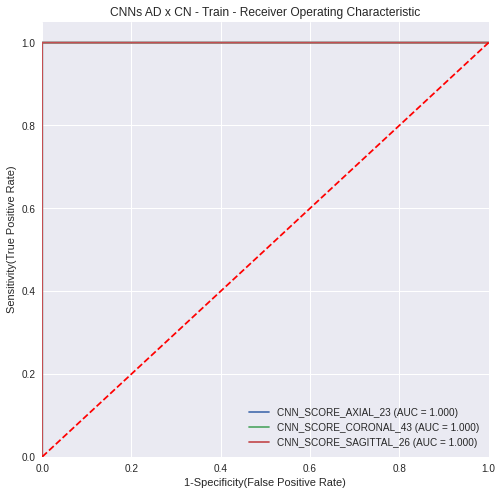

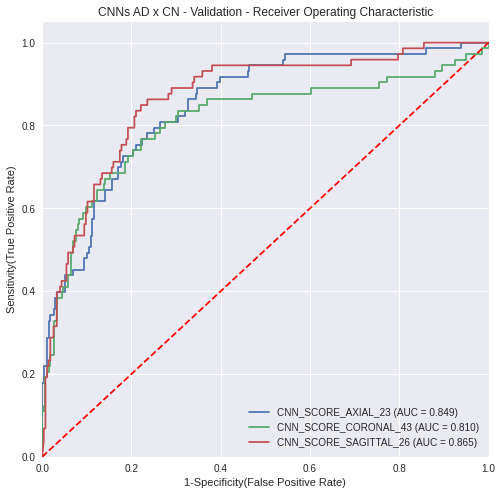

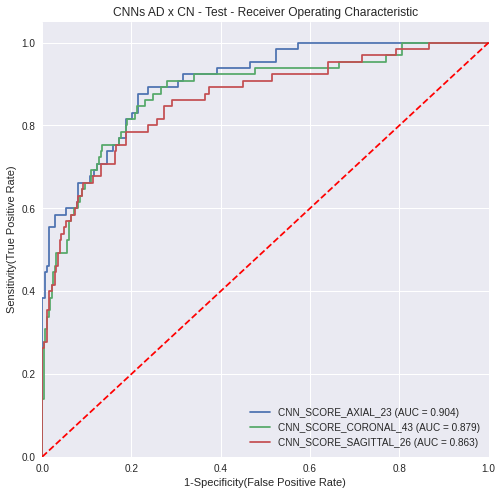

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,CNN_SCORE_AXIAL_23,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_SCORE_AXIAL_23,0.655753,Train
1,CNN_SCORE_CORONAL_43,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_SCORE_CORONAL_43,0.997879,Train
2,CNN_SCORE_SAGITTAL_26,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,CNN_SCORE_SAGITTAL_26,0.999764,Train
3,CNN_SCORE_AXIAL_23,0.7945205479452054,0.4794520547945205,0.849265,0.791498,0.907033,0.029474,0.780822,0.685921,0.875723,0.764493,0.714433,0.814553,CNN_SCORE_AXIAL_23,0.003795,Validation
4,CNN_SCORE_CORONAL_43,0.7671232876712328,0.6027397260273972,0.810403,0.747382,0.873425,0.032154,0.767123,0.670164,0.864083,0.778986,0.730033,0.827938,CNN_SCORE_CORONAL_43,0.163905,Validation
5,CNN_SCORE_SAGITTAL_26,0.863013698630137,0.589041095890411,0.865173,0.80995,0.920395,0.028175,0.835616,0.750595,0.920638,0.789855,0.741789,0.837921,CNN_SCORE_SAGITTAL_26,0.001953,Validation
6,CNN_SCORE_AXIAL_23,0.8923076923076924,0.6615384615384615,0.903615,0.853066,0.954164,0.025791,0.876923,0.797056,0.95679,0.784452,0.736543,0.832361,CNN_SCORE_AXIAL_23,0.003795,Test
7,CNN_SCORE_CORONAL_43,0.8769230769230769,0.6615384615384615,0.879315,0.823647,0.934983,0.028403,0.846154,0.75844,0.933868,0.787986,0.740364,0.835608,CNN_SCORE_CORONAL_43,0.163905,Test
8,CNN_SCORE_SAGITTAL_26,0.8,0.6615384615384615,0.863006,0.804352,0.92166,0.029926,0.784615,0.684676,0.884554,0.812721,0.767266,0.858175,CNN_SCORE_SAGITTAL_26,0.001953,Test


In [6]:
models = ['CNN_SCORE_AXIAL_23','CNN_SCORE_CORONAL_43', 'CNN_SCORE_SAGITTAL_26']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='MACRO_GROUP',roc_title_prefix='CNNs AD x CN - ')
df_rocs

In [7]:
check_auc_difference(models,datasets,label='MACRO_GROUP',alpha=0.05)

Comparing AUCs between CNN_SCORE_AXIAL_23 and CNN_SCORE_CORONAL_43:
set: Validation
 p-value = 0.1891
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = 0.4137
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------
Comparing AUCs between CNN_SCORE_AXIAL_23 and CNN_SCORE_SAGITTAL_26:
set: Validation
 p-value = 0.5772
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = 0.2094
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------
Comparing AUCs between CNN_SCORE_CORONAL_43 and CNN_SCORE_SAGITTAL_26:
set: Validation
 p-value = 0.1761
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = 0.6458
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------


### Metrics table

In [8]:
df_result_metrics = calculate_metrics_on_datasets(models=models,datasets = datasets,df_rocs=df_rocs,label='MACRO_GROUP',verbose=0)
df_test = df_result_metrics.query("Set == 'Test'").drop(["Conf_Mat",'Set'],axis=1)
df_test

,Model,Auc,F1Score,Accuracy,Precision,Recall,Prediction_Threshold
6,CNN_SCORE_AXIAL_23,0.904,0.595,0.805,0.485,0.769,0.004
7,CNN_SCORE_CORONAL_43,0.879,0.609,0.819,0.510,0.754,0.164
8,CNN_SCORE_SAGITTAL_26,0.863,0.580,0.787,0.459,0.785,0.002


In [9]:
df_all_metrics = pd.pivot_table(data=df_result_metrics.drop(['Conf_Mat'],axis=1),index=['Model','Set'])
df_all_metrics = df_all_metrics.sort_index(key=lambda x: x.map({'CNN_SCORE_AXIAL_23':0,'CNN_SCORE_CORONAL_43':1,'Train':0,'Validation':1}))
df_all_metrics

Accuracy    Auc  F1Score  Precision  \
Model                 Set                                               
CNN_SCORE_AXIAL_23    Train          1.000  1.000    1.000      1.000   
                      Validation     0.768  0.849    0.585      0.467   
                      Test           0.805  0.904    0.595      0.485   
CNN_SCORE_CORONAL_43  Train          1.000  1.000    1.000      1.000   
                      Validation     0.777  0.810    0.589      0.479   
                      Test           0.819  0.879    0.609      0.510   
CNN_SCORE_SAGITTAL_26 Train          1.000  1.000    1.000      1.000   
                      Validation     0.799  0.865    0.635      0.513   
                      Test           0.787  0.863    0.580      0.459   

                                  Prediction_Threshold  Recall  
Model                 Set                                       
CNN_SCORE_AXIAL_23    Train                      0.656   1.000  
                      Validation                 0.004   0.781  
                      Test                       0.004   0.769  
CNN_SCORE_CORONAL_43  Train                      0.998   1.000  
                      Validation                 0.164   0.767  
                      Test                       0.164   0.754  
CNN_SCORE_SAGITTAL_26 Train                      1.000   1.000  
                      Validation                 0.002   0.836  
                      Test                       0.002   0.785

### Confusion Matrix

In [10]:
for i,item in df_result_metrics.iterrows():
    print(item['Model'] + ' - ' + item['Set'])
    print(pd.DataFrame(item['Conf_Mat']))
    print('---------------------------')

CNN_SCORE_AXIAL_23 - Train
      0    1
0  1234    0
1     0  488
---------------------------
CNN_SCORE_CORONAL_43 - Train
      0    1
0  1234    0
1     0  488
---------------------------
CNN_SCORE_SAGITTAL_26 - Train
      0    1
0  1234    0
1     0  488
---------------------------
CNN_SCORE_AXIAL_23 - Validation
     0   1
0  211  65
1   16  57
---------------------------
CNN_SCORE_CORONAL_43 - Validation
     0   1
0  215  61
1   17  56
---------------------------
CNN_SCORE_SAGITTAL_26 - Validation
     0   1
0  218  58
1   12  61
---------------------------
CNN_SCORE_AXIAL_23 - Test
     0   1
0  230  53
1   15  50
---------------------------
CNN_SCORE_CORONAL_43 - Test
     0   1
0  236  47
1   16  49
---------------------------
CNN_SCORE_SAGITTAL_26 - Test
     0   1
0  223  60
1   14  51
---------------------------


## MCI x CN

In [11]:
df_preds = pd.read_csv(data_path+'PREDICTIONS_MCI_VGG19_BN.csv')
imgs_coronal = df_preds.query("ORIENTATION in ('coronal')")['IMAGE_DATA_ID'].tolist()
imgs_axial = df_preds.query("ORIENTATION in ('axial')")['IMAGE_DATA_ID'].tolist()
imgs_sagittal = df_preds.query("ORIENTATION in ('sagittal')")['IMAGE_DATA_ID'].tolist()
axial_diffs = list(set(imgs_coronal) - set(imgs_axial))

other_missing_mris = ['I254766', 'I85612', 'I85589', 'I86179', 'I85699', 'I321306',
       'I82125', 'I119487', 'I223283', 'I296801', 'I148873', 'I47709',
       'I47859', 'I280596', 'I280591', 'I39736', 'I67743', 'I35815',
       'I267765', 'I63099', 'I63097', 'I63095', 'I133472', 'I312665',
       'I133486', 'I274525', 'I274523', 'I38658', 'I79913', 'I119133',
       'I236970', 'I95628', 'I200217', 'I46381', 'I293688', 'I52770']

df_mri = prepare_mri_predictions(data_path+'PREDICTIONS_MCI_VGG19_BN.csv').dropna()
datasets = [df_mri.query("DATASET in ('train','train_cnn')"),
            df_mri.query("DATASET == 'validation'"),
            df_mri.query("DATASET == 'test'")]
axial_diffs

['I274525', 'I274523', 'I293688', 'I280596', 'I223283']

In [12]:
# df_mri.query("DATASET == 'validation'").shape
prepare_mri_predictions(data_path+'PREDICTIONS_MCI_VGG19_BN.csv')\
    .query("IMAGE_DATA_ID in @axial_diffs")

,SUBJECT,IMAGE_DATA_ID,DATASET,MACRO_GROUP,CNN_SCORE_AXIAL_8,CNN_SCORE_CORONAL_70,CNN_SCORE_SAGITTAL_50
485,016_S_0359,I293688,validation,0,NaN,0.575252,0.611845
1400,067_S_0056,I274523,train_cnn,0,NaN,0.529465,0.604635
1407,067_S_0059,I274525,validation,0,NaN,0.532123,0.587051
1577,073_S_2153,I223283,train_cnn,1,NaN,0.529127,0.671789
2070,128_S_0863,I280596,validation,0,NaN,0.530115,0.610597


### Dataset size

In [13]:
df_size = datasets_sizes(df_mri,datasets)
print("Preprocessed MRI dataset - MCI x CN:")
df_size

Preprocessed MRI dataset - MCI x CN:


,Set,Total Samples,Positive Samples,Negative Samples,Positive Percentage
0,Train,1732,499,1233,28.9
1,Validation,355,82,273,23.1
2,Test,364,81,283,22.3
3,TOTAL,2451,662,1789,27.1


In [14]:
prepare_mri_predictions(data_path+'PREDICTIONS_MCI_VGG19_BN.csv').query("DATASET == 'validation'").shape

(358, 7)

### ROC Curves

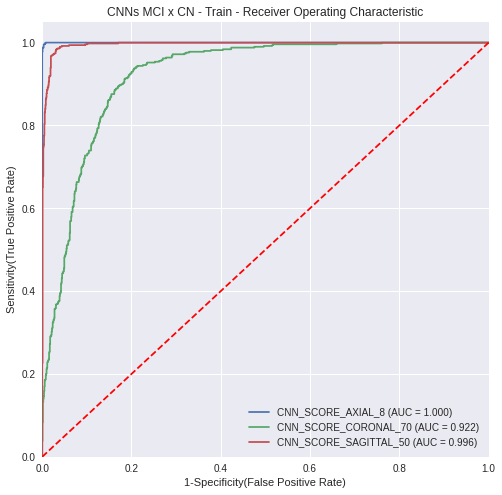

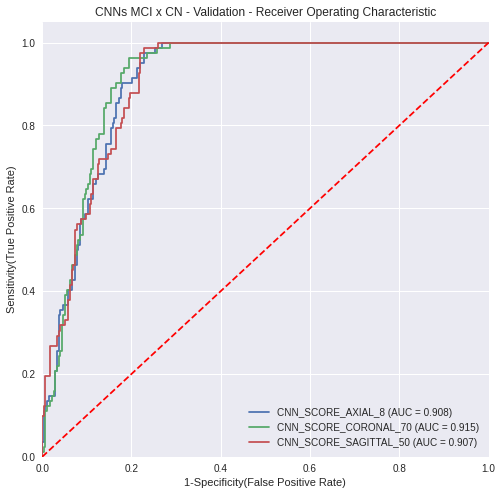

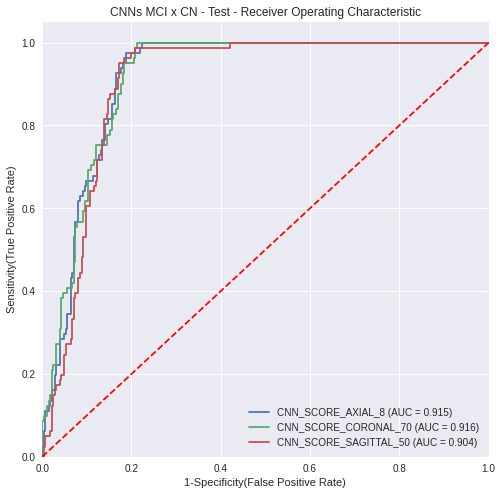

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,CNN_SCORE_AXIAL_8,1.0,1.0,0.999938,0.99945,1.000426,0.000249,0.995992,0.990448,1.001536,0.996756,0.993582,0.99993,CNN_SCORE_AXIAL_8,0.597011,Train
1,CNN_SCORE_CORONAL_70,0.9519038076152304,0.7274549098196392,0.921909,0.905107,0.938711,0.008573,0.885772,0.857862,0.913681,0.837794,0.817217,0.858371,CNN_SCORE_CORONAL_70,0.472682,Train
2,CNN_SCORE_SAGITTAL_50,1.0,0.9959919839679359,0.995545,0.991409,0.999681,0.00211,0.983968,0.972948,0.994988,0.96837,0.958601,0.978139,CNN_SCORE_SAGITTAL_50,0.516961,Train
3,CNN_SCORE_AXIAL_8,0.975609756097561,0.5853658536585366,0.907531,0.863072,0.951991,0.022684,0.902439,0.838215,0.966663,0.820513,0.774989,0.866036,CNN_SCORE_AXIAL_8,0.322333,Validation
4,CNN_SCORE_CORONAL_70,0.975609756097561,0.6463414634146342,0.914545,0.871633,0.957457,0.021894,0.890244,0.822586,0.957902,0.846154,0.803354,0.888954,CNN_SCORE_CORONAL_70,0.465799,Validation
5,CNN_SCORE_SAGITTAL_50,0.9878048780487805,0.5853658536585366,0.907397,0.862909,0.951886,0.022699,0.97561,0.942221,1.008998,0.78022,0.731098,0.829342,CNN_SCORE_SAGITTAL_50,0.265075,Validation
6,CNN_SCORE_AXIAL_8,1.0,0.6666666666666666,0.915282,0.872324,0.958239,0.021918,0.925926,0.868892,0.98296,0.833922,0.790563,0.877281,CNN_SCORE_AXIAL_8,0.322333,Test
7,CNN_SCORE_CORONAL_70,1.0,0.6172839506172839,0.915892,0.873075,0.95871,0.021846,0.950617,0.903432,0.997802,0.816254,0.771133,0.861376,CNN_SCORE_CORONAL_70,0.465799,Test
8,CNN_SCORE_SAGITTAL_50,0.9876543209876543,0.6049382716049383,0.903721,0.858235,0.949207,0.023208,0.950617,0.903432,0.997802,0.826855,0.782771,0.870939,CNN_SCORE_SAGITTAL_50,0.265075,Test


In [15]:
models = ['CNN_SCORE_AXIAL_8','CNN_SCORE_CORONAL_70', 'CNN_SCORE_SAGITTAL_50']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='MACRO_GROUP',roc_title_prefix='CNNs MCI x CN - ')
df_rocs

In [16]:
check_auc_difference(models,datasets,label='MACRO_GROUP',alpha=0.05)

Comparing AUCs between CNN_SCORE_AXIAL_8 and CNN_SCORE_CORONAL_70:
set: Validation
 p-value = 0.6375
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = 0.9638
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------
Comparing AUCs between CNN_SCORE_AXIAL_8 and CNN_SCORE_SAGITTAL_50:
set: Validation
 p-value = 0.9922
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = 0.3733
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------
Comparing AUCs between CNN_SCORE_CORONAL_70 and CNN_SCORE_SAGITTAL_50:
set: Validation
 p-value = 0.6298
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = 0.3954
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------


### Metrics table

In [17]:
df_result_metrics = calculate_metrics_on_datasets(models=models,datasets = datasets,df_rocs=df_rocs,label='MACRO_GROUP',verbose=0)
df_test = df_result_metrics.query("Set == 'Test'").drop(["Conf_Mat",'Set'],axis=1)
df_test

,Model,Auc,F1Score,Accuracy,Precision,Recall,Prediction_Threshold
6,CNN_SCORE_AXIAL_8,0.915,0.708,0.843,0.605,0.852,0.322
7,CNN_SCORE_CORONAL_70,0.916,0.688,0.835,0.595,0.815,0.466
8,CNN_SCORE_SAGITTAL_50,0.904,0.732,0.843,0.591,0.963,0.265


In [18]:
df_all_metrics = pd.pivot_table(data=df_result_metrics.drop(['Conf_Mat'],axis=1),index=['Model','Set'])
df_all_metrics = df_all_metrics.sort_index(key=lambda x: x.map({'CNN_SCORE_AXIAL_8':0,'CNN_SCORE_CORONAL_70':1,'Train':0,'Validation':1}))
df_all_metrics

Accuracy    Auc  F1Score  Precision  \
Model                 Set                                               
CNN_SCORE_AXIAL_8     Train          0.997  1.000    0.994      0.992   
                      Validation     0.839  0.908    0.722      0.602   
                      Test           0.843  0.915    0.708      0.605   
CNN_SCORE_CORONAL_70  Train          0.852  0.922    0.775      0.688   
                      Validation     0.856  0.915    0.741      0.635   
                      Test           0.835  0.916    0.688      0.595   
CNN_SCORE_SAGITTAL_50 Train          0.973  0.996    0.954      0.926   
                      Validation     0.825  0.907    0.721      0.571   
                      Test           0.843  0.904    0.732      0.591   

                                  Prediction_Threshold  Recall  
Model                 Set                                       
CNN_SCORE_AXIAL_8     Train                      0.597   0.996  
                      Validation                 0.322   0.902  
                      Test                       0.322   0.852  
CNN_SCORE_CORONAL_70  Train                      0.473   0.886  
                      Validation                 0.466   0.890  
                      Test                       0.466   0.815  
CNN_SCORE_SAGITTAL_50 Train                      0.517   0.984  
                      Validation                 0.265   0.976  
                      Test                       0.265   0.963

### Confusion Matrix

In [19]:
for i,item in df_result_metrics.iterrows():
    print(item['Model'] + ' - ' + item['Set'])
    print(pd.DataFrame(item['Conf_Mat']))
    print('---------------------------')

CNN_SCORE_AXIAL_8 - Train
      0    1
0  1229    4
1     2  497
---------------------------
CNN_SCORE_CORONAL_70 - Train
      0    1
0  1033  200
1    57  442
---------------------------
CNN_SCORE_SAGITTAL_50 - Train
      0    1
0  1194   39
1     8  491
---------------------------
CNN_SCORE_AXIAL_8 - Validation
     0   1
0  224  49
1    8  74
---------------------------
CNN_SCORE_CORONAL_70 - Validation
     0   1
0  231  42
1    9  73
---------------------------
CNN_SCORE_SAGITTAL_50 - Validation
     0   1
0  213  60
1    2  80
---------------------------
CNN_SCORE_AXIAL_8 - Test
     0   1
0  238  45
1   12  69
---------------------------
CNN_SCORE_CORONAL_70 - Test
     0   1
0  238  45
1   15  66
---------------------------
CNN_SCORE_SAGITTAL_50 - Test
     0   1
0  229  54
1    3  78
---------------------------


# Cog Tests Training Results

## AD x CN

In [25]:
df_preds = pd.read_csv(data_path+'PREDICTIONS_AD_COG_TESTS.csv')[['SUBJECT','IMAGE_DATA_ID','DATASET','DIAGNOSIS','COGTEST_SCORE_EBM','COGTEST_SCORE_LR']]
df_preds['DATASET'].fillna('train_cog_tests',inplace=True)
datasets = [df_preds.query("DATASET in ('train','train_cog_tests')"),
            df_preds.query("DATASET == 'validation'"),
            df_preds.query("DATASET == 'test'")]

### Dataset size

In [26]:
df_size = datasets_sizes(df_preds,datasets,label='DIAGNOSIS')
print("Preprocessed Cog Tests dataset - AD x CN:")
df_size

Preprocessed Cog Tests dataset - AD x CN:


,Set,Total Samples,Positive Samples,Negative Samples,Positive Percentage
0,Train,2614,759,1855,29.1
1,Validation,346,73,273,21.1
2,Test,348,65,283,18.7
3,TOTAL,3308,897,2411,27.2


### ROC Curves

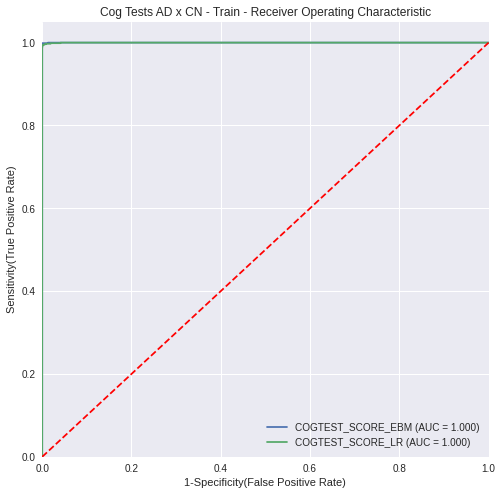

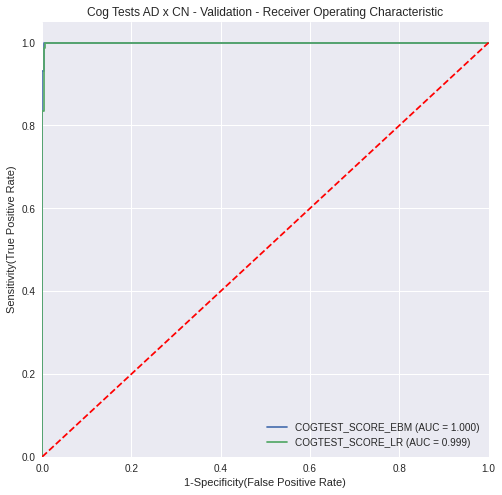

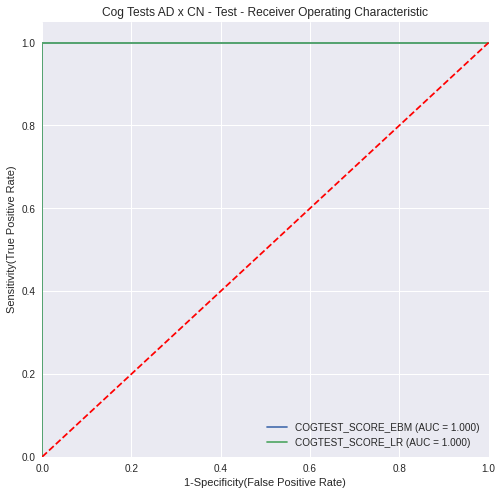

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,COGTEST_SCORE_EBM,1.0,1.0,0.999982,0.99977,1.000194,0.000108,0.998682,0.996102,1.001263,0.999461,0.998405,1.000517,COGTEST_SCORE_EBM,0.202838,Train
1,COGTEST_SCORE_LR,1.0,1.0,0.9999,0.999396,1.000403,0.000257,0.99473,0.989579,0.999881,0.997844,0.995733,0.999955,COGTEST_SCORE_LR,0.356785,Train
2,COGTEST_SCORE_EBM,1.0,1.0,0.999749,0.997175,1.002323,0.001313,1.0,1.0,1.0,0.996337,0.989171,1.003503,COGTEST_SCORE_EBM,0.809044,Validation
3,COGTEST_SCORE_LR,1.0,1.0,0.999348,0.995199,1.003497,0.002117,1.0,1.0,1.0,0.992674,0.982558,1.00279,COGTEST_SCORE_LR,0.620167,Validation
4,COGTEST_SCORE_EBM,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,COGTEST_SCORE_EBM,0.809044,Test
5,COGTEST_SCORE_LR,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,COGTEST_SCORE_LR,0.620167,Test


In [27]:
models = ['COGTEST_SCORE_EBM','COGTEST_SCORE_LR']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='DIAGNOSIS',roc_title_prefix='Cog Tests AD x CN - ')
df_rocs

In [29]:
check_auc_difference(models,datasets,label='DIAGNOSIS',alpha=0.05)

Comparing AUCs between COGTEST_SCORE_EBM and COGTEST_SCORE_LR:
set: Validation
 p-value = 0.2900
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = nan
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------


/home/lucas/projects/mmml-alzheimer-diagnosis/src/model_evaluation/de_long_evaluation.py:86: RuntimeWarning: invalid value encountered in true_divide
  z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))


### Metrics table

In [30]:
df_result_metrics = calculate_metrics_on_datasets(models=models,datasets = datasets,df_rocs=df_rocs,label='DIAGNOSIS',verbose=0)
df_test = df_result_metrics.query("Set == 'Test'").drop(["Conf_Mat",'Set'],axis=1)
df_test

,Model,Auc,F1Score,Accuracy,Precision,Recall,Prediction_Threshold
4,COGTEST_SCORE_EBM,1.0,0.992,0.997,1.0,0.985,0.809
5,COGTEST_SCORE_LR,1.0,0.984,0.994,1.0,0.969,0.620


In [31]:
df_all_metrics = pd.pivot_table(data=df_result_metrics.drop(['Conf_Mat'],axis=1),index=['Model','Set'])
df_all_metrics

Accuracy    Auc  F1Score  Precision  \
Model             Set                                               
COGTEST_SCORE_EBM Test           0.997  1.000    0.992      1.000   
                  Train          0.999  1.000    0.999      0.999   
                  Validation     0.997  1.000    0.993      0.986   
COGTEST_SCORE_LR  Test           0.994  1.000    0.984      1.000   
                  Train          0.997  1.000    0.995      0.995   
                  Validation     0.994  0.999    0.986      0.973   

                              Prediction_Threshold  Recall  
Model             Set                                       
COGTEST_SCORE_EBM Test                       0.809   0.985  
                  Train                      0.203   0.999  
                  Validation                 0.809   1.000  
COGTEST_SCORE_LR  Test                       0.620   0.969  
                  Train                      0.357   0.995  
                  Validation                 0.620   1.000

### Confusion Matrix

In [32]:
for i,item in df_result_metrics.iterrows():
    print(item['Model'] + ' - ' + item['Set'])
    print(pd.DataFrame(item['Conf_Mat']))
    print('---------------------------')

COGTEST_SCORE_EBM - Train
      0    1
0  1854    1
1     1  758
---------------------------
COGTEST_SCORE_LR - Train
      0    1
0  1851    4
1     4  755
---------------------------
COGTEST_SCORE_EBM - Validation
     0   1
0  272   1
1    0  73
---------------------------
COGTEST_SCORE_LR - Validation
     0   1
0  271   2
1    0  73
---------------------------
COGTEST_SCORE_EBM - Test
     0   1
0  283   0
1    1  64
---------------------------
COGTEST_SCORE_LR - Test
     0   1
0  283   0
1    2  63
---------------------------


## MCI x CN

In [33]:
df_preds = pd.read_csv(data_path+'PREDICTIONS_MCI_COG_TESTS.csv')[['SUBJECT','IMAGE_DATA_ID','DATASET','DIAGNOSIS','COGTEST_SCORE_EBM','COGTEST_SCORE_LR']]
df_preds['DATASET'].fillna('train_cog_tests',inplace=True)
datasets = [df_preds.query("DATASET in ('train','train_cog_tests')"),
            df_preds.query("DATASET == 'validation'"),
            df_preds.query("DATASET == 'test'")]

### Dataset size

In [34]:
df_size = datasets_sizes(df_preds,datasets,label='DIAGNOSIS')
print("Preprocessed Cog Tests dataset - MCI x CN:")
df_size

Preprocessed Cog Tests dataset - MCI x CN:


,Set,Total Samples,Positive Samples,Negative Samples,Positive Percentage
0,Train,4594,2739,1855,59.7
1,Validation,355,82,273,23.1
2,Test,364,81,283,22.3
3,TOTAL,5313,2902,2411,54.7


### ROC Curves

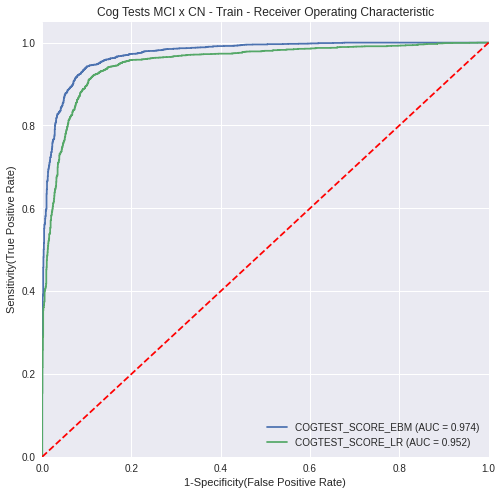

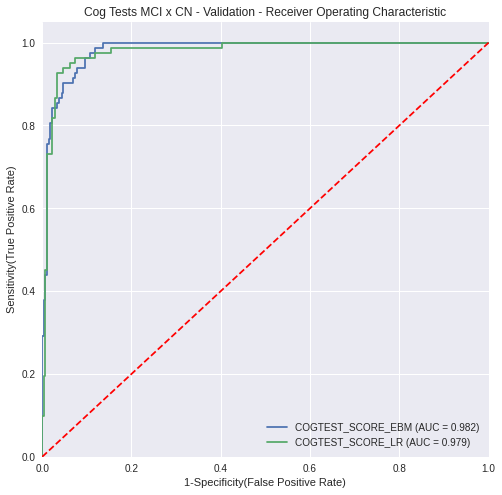

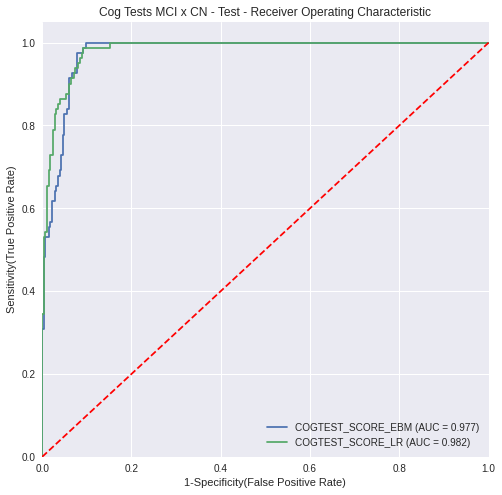

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,COGTEST_SCORE_EBM,0.9802847754654983,0.941219423147134,0.97371,0.969343,0.978078,0.002229,0.920409,0.910273,0.930545,0.921294,0.90904,0.933548,COGTEST_SCORE_EBM,0.652584,Train
1,COGTEST_SCORE_LR,0.9631252281854692,0.8966776195691858,0.952157,0.9462,0.958114,0.003039,0.910551,0.899863,0.921239,0.895957,0.882063,0.909851,COGTEST_SCORE_LR,0.495815,Train
2,COGTEST_SCORE_EBM,1.0,0.9634146341463414,0.982176,0.961875,1.002478,0.010358,0.939024,0.887232,0.990817,0.923077,0.891467,0.954687,COGTEST_SCORE_EBM,0.785128,Validation
3,COGTEST_SCORE_LR,0.9878048780487805,0.9634146341463414,0.978915,0.956869,1.000961,0.011248,0.939024,0.887232,0.990817,0.952381,0.927119,0.977643,COGTEST_SCORE_LR,0.676679,Validation
4,COGTEST_SCORE_EBM,1.0,1.0,0.97653,0.953163,0.999897,0.011922,0.975309,0.941513,1.009104,0.922261,0.891065,0.953458,COGTEST_SCORE_EBM,0.785128,Test
5,COGTEST_SCORE_LR,1.0,0.9876543209876543,0.982158,0.961727,1.002588,0.010424,0.975309,0.941513,1.009104,0.911661,0.878597,0.944725,COGTEST_SCORE_LR,0.676679,Test


In [35]:
models = ['COGTEST_SCORE_EBM','COGTEST_SCORE_LR']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='DIAGNOSIS',roc_title_prefix='Cog Tests MCI x CN - ')
df_rocs

In [36]:
check_auc_difference(models,datasets,label='DIAGNOSIS',alpha=0.05)

Comparing AUCs between COGTEST_SCORE_EBM and COGTEST_SCORE_LR:
set: Validation
 p-value = 0.4471
 Cannot reject null hypothesis. AUCs are statistically the same.

set: Test
 p-value = 0.1276
 Cannot reject null hypothesis. AUCs are statistically the same.

------------------------------------------


### Metrics table

In [37]:
df_result_metrics = calculate_metrics_on_datasets(models=models,datasets = datasets,df_rocs=df_rocs,label='DIAGNOSIS',verbose=0)
df_test = df_result_metrics.query("Set == 'Test'").drop(["Conf_Mat",'Set'],axis=1)
df_test

,Model,Auc,F1Score,Accuracy,Precision,Recall,Prediction_Threshold
4,COGTEST_SCORE_EBM,0.977,0.857,0.931,0.798,0.926,0.785
5,COGTEST_SCORE_LR,0.982,0.854,0.929,0.784,0.938,0.677


In [38]:
df_all_metrics = pd.pivot_table(data=df_result_metrics.drop(['Conf_Mat'],axis=1),index=['Model','Set'])
df_all_metrics = df_all_metrics.sort_index(key=lambda x: x.map({'COGTEST_SCORE_EBM':0,'COGTEST_SCORE_LR':1,'Train':0,'Validation':1}))
df_all_metrics

Accuracy    Auc  F1Score  Precision  \
Model             Set                                               
COGTEST_SCORE_EBM Train          0.921  0.974    0.933      0.945   
                  Validation     0.927  0.982    0.856      0.786   
                  Test           0.931  0.977    0.857      0.798   
COGTEST_SCORE_LR  Train          0.905  0.952    0.919      0.928   
                  Validation     0.949  0.979    0.895      0.856   
                  Test           0.929  0.982    0.854      0.784   

                              Prediction_Threshold  Recall  
Model             Set                                       
COGTEST_SCORE_EBM Train                      0.653   0.920  
                  Validation                 0.785   0.939  
                  Test                       0.785   0.926  
COGTEST_SCORE_LR  Train                      0.496   0.911  
                  Validation                 0.677   0.939  
                  Test                       0.677   0.938

### Confusion Matrix

In [39]:
for i,item in df_result_metrics.iterrows():
    print(item['Model'] + ' - ' + item['Set'])
    print(pd.DataFrame(item['Conf_Mat']))
    print('---------------------------')

COGTEST_SCORE_EBM - Train
      0     1
0  1709   146
1   218  2521
---------------------------
COGTEST_SCORE_LR - Train
      0     1
0  1662   193
1   245  2494
---------------------------
COGTEST_SCORE_EBM - Validation
     0   1
0  252  21
1    5  77
---------------------------
COGTEST_SCORE_LR - Validation
     0   1
0  260  13
1    5  77
---------------------------
COGTEST_SCORE_EBM - Test
     0   1
0  264  19
1    6  75
---------------------------
COGTEST_SCORE_LR - Test
     0   1
0  262  21
1    5  76
---------------------------
